In [1]:
import torch
print(torch.__version__)

1.9.1+cpu


# Pytorch深度学习简明教程

## 线性回归实例

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
data = pd.read_csv('income.csv')

In [4]:
data

,Unnamed: 0,Education,Income
0,1,10.512201,45.125171
1,2,10.828966,45.324576
2,3,10.976856,46.712053
3,4,11.180240,47.484910
4,5,12.151392,52.118514
5,6,12.374742,50.765302
6,7,12.646349,51.892805
7,8,12.862663,53.789805
8,9,12.877941,55.173903
9,10,12.890705,54.048666


In [5]:
data.info() # 输出文件的一些重要信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   Education   60 non-null     float64
 2   Income      60 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


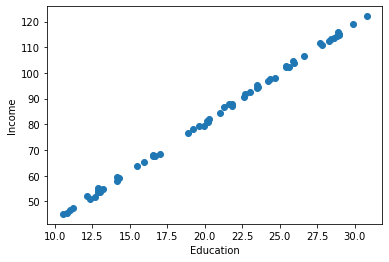

In [6]:
# 绘图看一下数据
plt.scatter(data.Education, data.Income)
plt.xlabel("Education")
plt.ylabel("Income")
plt.show()

In [7]:
from torch import nn  # torch中最常用的模块

1. 预处理数据

In [8]:
X = data.Education.values  # 返回一个`array`对象

In [9]:
print(X.shape)
X

(60,)


array([10.51220109, 10.82896639, 10.97685611, 11.18023954, 12.15139247,
       12.37474203, 12.64634908, 12.86266342, 12.87794092, 12.89070532,
       12.91498364, 13.01660512, 13.17988114, 14.122664  , 14.1275149 ,
       14.28679869, 15.44779738, 15.97241875, 16.52799346, 16.53203198,
       16.69392983, 17.02746898, 18.86780064, 19.23549986, 19.58462572,
       19.92187622, 20.11324539, 20.24247514, 20.261879  , 21.02686524,
       21.29914071, 21.59372393, 21.80076257, 21.81515153, 22.58336357,
       22.66195444, 23.04202444, 23.46402352, 23.47598134, 23.5381039 ,
       24.20579541, 24.3303452 , 24.65662831, 25.38563531, 25.40088241,
       25.59271293, 25.86117958, 25.97609508, 26.60564258, 27.70473859,
       27.829065  , 28.30635441, 28.4438296 , 28.6094264 , 28.83481106,
       28.90663894, 28.92801581, 28.9323703 , 29.89536137, 30.81050882])

In [10]:
# X.reshape(-1,1)  # `reshape()`函数并不会改变自身
X = X.reshape(-1, 1)

In [11]:
print(X.shape)
X

(60, 1)


array([[10.51220109],
       [10.82896639],
       [10.97685611],
       [11.18023954],
       [12.15139247],
       [12.37474203],
       [12.64634908],
       [12.86266342],
       [12.87794092],
       [12.89070532],
       [12.91498364],
       [13.01660512],
       [13.17988114],
       [14.122664  ],
       [14.1275149 ],
       [14.28679869],
       [15.44779738],
       [15.97241875],
       [16.52799346],
       [16.53203198],
       [16.69392983],
       [17.02746898],
       [18.86780064],
       [19.23549986],
       [19.58462572],
       [19.92187622],
       [20.11324539],
       [20.24247514],
       [20.261879  ],
       [21.02686524],
       [21.29914071],
       [21.59372393],
       [21.80076257],
       [21.81515153],
       [22.58336357],
       [22.66195444],
       [23.04202444],
       [23.46402352],
       [23.47598134],
       [23.5381039 ],
       [24.20579541],
       [24.3303452 ],
       [24.65662831],
       [25.38563531],
       [25.40088241],
       [25

In [12]:
X = X.astype(np.float32)  # 统一`numpy`的数据类型
X = torch.from_numpy(X)  # 获取`torch`中的`tensor`的数据类型

In [13]:
X

tensor([[10.5122],
        [10.8290],
        [10.9769],
        [11.1802],
        [12.1514],
        [12.3747],
        [12.6463],
        [12.8627],
        [12.8779],
        [12.8907],
        [12.9150],
        [13.0166],
        [13.1799],
        [14.1227],
        [14.1275],
        [14.2868],
        [15.4478],
        [15.9724],
        [16.5280],
        [16.5320],
        [16.6939],
        [17.0275],
        [18.8678],
        [19.2355],
        [19.5846],
        [19.9219],
        [20.1132],
        [20.2425],
        [20.2619],
        [21.0269],
        [21.2991],
        [21.5937],
        [21.8008],
        [21.8152],
        [22.5834],
        [22.6620],
        [23.0420],
        [23.4640],
        [23.4760],
        [23.5381],
        [24.2058],
        [24.3303],
        [24.6566],
        [25.3856],
        [25.4009],
        [25.5927],
        [25.8612],
        [25.9761],
        [26.6056],
        [27.7047],
        [27.8291],
        [28.3064],
        [28.

In [14]:
Y = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

In [15]:
Y

tensor([[ 45.1252],
        [ 45.3246],
        [ 46.7121],
        [ 47.4849],
        [ 52.1185],
        [ 50.7653],
        [ 51.8928],
        [ 53.7898],
        [ 55.1739],
        [ 54.0487],
        [ 54.6860],
        [ 53.8486],
        [ 54.7468],
        [ 59.5279],
        [ 58.0925],
        [ 59.2898],
        [ 63.5965],
        [ 65.4793],
        [ 67.8064],
        [ 68.1135],
        [ 67.8159],
        [ 68.4091],
        [ 76.6976],
        [ 78.1902],
        [ 79.4216],
        [ 79.4527],
        [ 81.1551],
        [ 80.9082],
        [ 82.1692],
        [ 84.5390],
        [ 86.7458],
        [ 88.0416],
        [ 87.3146],
        [ 87.8976],
        [ 90.8168],
        [ 91.6789],
        [ 92.5597],
        [ 94.2698],
        [ 95.4370],
        [ 94.4448],
        [ 96.7784],
        [ 97.4553],
        [ 97.9841],
        [102.5265],
        [102.3177],
        [102.4044],
        [104.5347],
        [103.7092],
        [106.4922],
        [111.5403],


2. 创建模型

In [16]:
model = nn.Linear(1, 1)  # output = w .* input + b

In [17]:
loss_fn = nn.MSELoss()  # 设置 MSE 为 损失函数

In [18]:
opt = torch.optim.SGD(model.parameters(), lr=0.0001)  # 优化方法

3.训练模型

In [19]:
for epoch in range(5000):
    for x, y in zip(X,Y):
        y_pred = model(x)          # 使用模型预测
        loss = loss_fn(y, y_pred)  # 根据预测结果计算损失
        opt.zero_grad()            # 把变量梯度清零
        loss.backward()            # 求解梯度
        opt.step()                 # 优化模型参数

4.调用模型

In [20]:
model.weight

Parameter containing:
tensor([[3.8280]], requires_grad=True)

In [21]:
model.bias

Parameter containing:
tensor([4.4533], requires_grad=True)

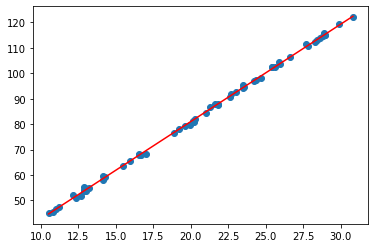

In [22]:
# 绘图看一下数据
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), model(X).data.numpy(), c="r")
plt.show()

## 张量（Tensor）

Pytorch最基本的操作对象就是`Tensor`（张量）,

它表示一个多维矩阵，

张量类似于Numpy的ndarrays，

张量可以在GPU上使用以加速计算。（ndarray不能在GPU加速）

### Tensor的基本操作

In [23]:
import torch

In [24]:
x = torch.rand(2,3)  # `torch.rand()` 0-1随机浮点数
x

tensor([[0.0399, 0.8132, 0.3738],
        [0.6322, 0.6480, 0.8645]])

In [25]:
x1 = torch.randn(2, 3)  # `torch.randn()` 正态分布
x1

tensor([[ 0.1473, -0.7028,  0.4601],
        [-0.7961, -0.2215,  1.8203]])

In [26]:
x_zero = torch.zeros(2, 3)  # 零矩阵
x_zero

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [27]:
x_one = torch.ones(2, 3)  # 一矩阵
x_one

tensor([[1., 1., 1.],
        [1., 1., 1.]])

- 查看数据尺寸

In [28]:
print(x.size())
print(x.shape)
print(x.size() == x.shape)

torch.Size([2, 3])
torch.Size([2, 3])
True


`size()` 和 `shape` 的区别是 `size()` 可以查看单独某一维的数据尺寸

In [29]:
print(x.size(0))

2


- Tensor基本的数据类型

    32位浮点型：torch.float32
    
    64位浮点型：torch.float64
    
    16位整型：torch.int16
    
    32位整型：torch.int32
    
    64位整型：torch.int64

- 与python数据类型交互

In [30]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)  # 列表 等转换为 `tensor`
print(x)

tensor([1., 2., 3., 4.])


In [31]:
# 数据类型转换
print(x.type())
x = x.type(torch.int64)
print(x.type())
print(x)

torch.FloatTensor
torch.LongTensor
tensor([1, 2, 3, 4])


In [32]:
# tensor 与 ndarray 数据类型的转换
import numpy as np
a = np.random.randn(2, 3)
print(a)

[[ 0.56383962 -0.14299263 -0.82205624]
 [ 1.05662285  0.36770689  0.00760555]]


In [33]:
a_tensor = torch.from_numpy(a)
print(a_tensor)

tensor([[ 0.5638, -0.1430, -0.8221],
        [ 1.0566,  0.3677,  0.0076]], dtype=torch.float64)


### Tensor的运算与形状变换

In [34]:
x1 = torch.rand(2, 3)
x1

tensor([[0.8878, 0.1351, 0.9869],
        [0.4596, 0.3603, 0.9229]])

In [35]:
x2 = torch.rand(2, 3)
x2

tensor([[0.9738, 0.6613, 0.7267],
        [0.9509, 0.8172, 0.4612]])

In [36]:
x1 + x2  # 计算特点

tensor([[1.8616, 0.7964, 1.7136],
        [1.4104, 1.1775, 1.3841]])

In [37]:
x1 + 3

tensor([[3.8878, 3.1351, 3.9869],
        [3.4596, 3.3603, 3.9229]])

In [38]:
x1.add(3)  # 返回一个结果

tensor([[3.8878, 3.1351, 3.9869],
        [3.4596, 3.3603, 3.9229]])

In [47]:
x3 = torch.ones(2,3)
x3.copy_(x1)  # x3 = x1 是深拷贝，相当于C++中的引用，x3改变的同时，x1也会改变
x3.add_(3)    # `add_` 就地改变自身
x3

tensor([[3.8878, 3.1351, 3.9869],
        [3.4596, 3.3603, 3.9229]])

In [48]:
x1.view(3, 2)  # `tensor.view()` 相当于 `numpy.reshape()` ; -1 代表自动计算 （只能有一个-1参数）

tensor([[0.8878, 0.1351],
        [0.9869, 0.4596],
        [0.3603, 0.9229]])

In [49]:
x1.mean()  # 均值

tensor(0.6254)

In [50]:
x1.sum()  # 求和

tensor(3.7525)

In [51]:
# 注意这些都是 tensor 的数据类型，需要转换为 python 的标准值需要进行转换
x1.sum().item()

3.752526044845581

### Tensor 的自动微分

将 ` Torch.Tensor` 属性 `.requires_grad` 设置为 `True`，

`pytorch` 将开始跟踪此张量的所有操作。

完成计算后，可以调用 `.backward()` 并自动计算所有梯度。

该张量的梯度将累加到 `.grad` 属性中。


In [52]:
x = torch.ones(2,2, requires_grad=True)

In [53]:
print(x)
x.requires_grad

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


True

因此这里需要了解一下 Tensor 在 Pytorch 中的数据结构

- data

- grad

- grad_fn

In [54]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [55]:
x.grad     # 返回空，也就是 NULL

In [56]:
x.grad_fn  # 返回空，也就是 NULL 

In [57]:
y = x + 2

In [58]:
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [59]:
y.grad_fn

In [60]:
z = y * y + 3

In [61]:
out = z.mean()

In [62]:
# z 和 out 都是计算来的，因此都有`grad_fn`
print(z)
print(out)

tensor([[12., 12.],
        [12., 12.]], grad_fn=<AddBackward0>)
tensor(12., grad_fn=<MeanBackward0>)


- 微分运算

    d(out)/d(x)

In [63]:
out.backward()  # 计算 out 的微分，将结果存在 x 里

In [64]:
x.grad          # 此时 x 的梯度就不为空了

tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])

In [65]:
x.data          # 但是 x 的数据是没有变化的

tensor([[1., 1.],
        [1., 1.]])

In [66]:
# 在with结构体内，就不会自动跟踪计算微分
with torch.no_grad():
    print((x**2).requires_grad)

False


In [67]:
# 不包含在with结构体内，就会一直跟踪数据
print((x**2).requires_grad)

True


In [68]:
# 如果想获取不包含不跟踪微分的数据，可以用`detach`来赋值
x_no_grad = x.detach()
print(x_no_grad)
print(x_no_grad.requires_grad)

tensor([[1., 1.],
        [1., 1.]])
False


In [69]:
x_no_grad.requires_grad_(True)  # `_`可以改变自身属性

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

### 入门实例的分解

对于线性模型，`y = w * x + b`，需要初始化两个变量

In [73]:
import torch

In [75]:
# 获取数据
X = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))
Y = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

In [70]:
# 初始化变量
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [74]:
# 学习速率
learning_rate = 0.0001

In [76]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b
        loss = (y - y_pred).pow(2).mean()  # 均方误差
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:
            b.grad.data.zero_()
        loss.backward()
        with torch.no_grad():  # 优化部分，不需要跟踪梯度
            w.data -= w.grad.data * learning_rate
            b.data -= b.grad.data * learning_rate

In [77]:
print(w, b)

tensor([3.8285], requires_grad=True) tensor([4.4399], requires_grad=True)


## 逻辑回归与多层感知器

### 简介与数据预处理

- Sigmoid 函数

    ![](https://i.loli.net/2021/10/23/SwWv2xcTzGLHRt3.png)
    
    Sigmoid函数是一个概率分布函数，给定某个输入，它将输出为一个概率值。
    
- 逻辑回归损失函数

    平方差所惩罚的是与损失为同一数量级的情形
    
    对于分类问题，我们最好的使用交叉熵损失函数会更有效，
    
    交叉熵会输出一个更大的“损失”。
    
    交叉熵刻画的是实际输出（概率）与期望输出（概率）的距离，也就是交叉熵的值越小，两个概率分布就越接近。
    
    假设概率分布p为期望输出，概率分布q为实际输出，H(p,q)为交叉熵，则：
    
    $$
    H(p,q) = - \sum_{x}{p(x)\log{q(x)}}
    $$
    
    损失曲线：
    
    ![](https://i.loli.net/2021/10/23/oR4lVExteMjNKy7.png)
    
- Pytorch交叉熵

    在pytorch里，我们使用 `nn.BCELoss()` 来计算二元交叉熵。

### 逻辑回归模型的创建与训练

In [79]:
import torch
from torch import nn

In [80]:
model = nn.Sequential(
            nn.Linear(15,1),  # 15维映射1维
            nn.Sigmoid()
)

In [82]:
loss = nn.BCELoss()  # 二元交叉熵

In [83]:
# 优化函数
opt = torch.optim.Adam(model.parameters(), lr=0.001)  # SDG是随机梯度下降，Adam会考虑之前的下降速率，并进行加权

In [84]:
# 分批次训练
batches = 16
no_of_batch = 653 // 16

In [85]:
# 训练次数
epoches = 1000

In [86]:
for epoch in range(epoches):
    for i in range(no_of_batch):
        start = i * batches
        end = start + batches
#         x = X[start:end]
#         y = y[start:end]
#         y_pred = model(x)
#         loss = loss_fn(y_pred, y)
#         opt.zero_grad()
#         loss.backward()
#         opt.step()

In [87]:
model.state_dict()  # sigmoid(w1*x1+w2*x2+...+wn*xn+b)

OrderedDict([('0.weight',
              tensor([[-0.0421,  0.1042, -0.2141, -0.0364,  0.1143,  0.1074,  0.2436, -0.1221,
                        0.0032,  0.2151, -0.0141, -0.1125, -0.0324, -0.0995,  0.1659]])),
             ('0.bias', tensor([0.0103]))])

In [ ]:
# 计算正确率
# ((model(X).data.numpy() > 0.5).astype("int") == Y.numpy()).mean()

### 多层感知器（神经网络）

逻辑回归模型就是一个单个神经元：

计算输入特征的加权和，然后使用一个激活函数（或传递函数）计算输出。

- 单个神经元

    ![](https://i.loli.net/2021/10/23/dFAZozBbrnQme2C.png)
     
- 多个神经元

    ![](https://i.loli.net/2021/10/23/riYlG6qwkxnSzKo.png)
    
- 单层神经元的缺陷

    无法拟合“异或”运算
    
    异或问题看似简单，但是单层神经元确实没有办法解决。
    
    神经元要求数据必须是线性可分的，异或问题无法找到一条直线分割两个类，这个问题使得神经网络的发展停滞了很多年。